In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
              
 # Plotly Packages

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

# Other Libraries
import warnings
warnings.filterwarnings("ignore")       

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/now-you-are-playing-with-power/sample_submission.csv
/kaggle/input/now-you-are-playing-with-power/train.csv
/kaggle/input/now-you-are-playing-with-power/test.csv


In [2]:

train_data = pd.read_csv('../input/now-you-are-playing-with-power/train.csv')
test_data = pd.read_csv('../input/now-you-are-playing-with-power/test.csv')

orignal_df = train_data.copy()

In [3]:
train_data.head()

,id,obs_day,obs_hour,obs_minute,C_motion,fw_motion,faucet_hole,vap_pressure,vap_enth,vap_pressure_div,vap_motion,fw_enth,vap_temp,output_gen
0,a563699ca2a601c6ac64aa29986a00a90fb42b48741695...,Saturday,5.0,46.0,361.486145,2542.801078,0.666879,24.138243,2788.168701,25.448248,2543.177002,1270.066040,603.834106,930.271729
1,91ab3eb3bcf6c8c1c5fe2da9ba671aa5a48c7369d9a50f...,Saturday,18.0,NaN,197.064667,1454.458144,NaN,12.702796,NaN,13.405114,1454.421021,1095.314453,500.178772,473.562103
2,7128c51c554735d6c81862684ad6005ae12d2edbcd4644...,Saturday,3.0,51.0,356.869232,2458.671690,0.678685,NaN,2784.910889,NaN,2456.578369,1262.656982,603.529663,904.269897
3,c8144b52e4f63014de0a0d8e1c629bf0b05cb2696cfc23...,Saturday,13.0,NaN,239.267517,1628.127295,0.679137,15.378051,2881.876709,16.252741,1626.861328,1148.203857,593.649658,597.799194
4,88d15a5b2df6692f23d105ff1ae82ae026be00c9271eef...,Friday,11.0,13.0,NaN,2621.829401,0.676403,24.517698,2787.063232,NaN,2621.653564,1280.567383,602.601501,950.284973


In [4]:
train_data.describe()

,obs_hour,obs_minute,C_motion,fw_motion,faucet_hole,vap_pressure,vap_enth,vap_pressure_div,vap_motion,fw_enth,vap_temp,output_gen
count,64030.000000,64148.000000,64089.000000,64088.000000,64085.000000,64069.000000,64179.000000,64197.000000,64108.000000,64157.000000,64112.000000,72000.000000
mean,11.876573,29.331951,328.502440,2287.004777,0.670591,21.795922,2795.466210,23.003577,2309.925216,1230.615583,591.008818,829.873198
std,6.036525,17.297359,83.352896,448.204859,0.011327,5.545952,39.308843,5.832061,567.651009,255.842264,30.045351,174.256932
min,0.000000,0.000000,114.718575,1082.600626,0.602171,9.264307,2693.728271,9.766433,1085.054565,0.000000,466.858826,337.281067
25%,7.000000,14.000000,319.363281,2229.210642,0.662388,22.209974,2772.308716,23.490790,2333.306030,1248.165649,600.529053,841.792420
50%,12.000000,29.000000,350.142700,2461.767206,0.675311,23.302608,2787.034424,24.588034,2462.670654,1263.858887,602.362214,903.376618
75%,17.000000,44.000000,361.965179,2553.177473,0.678516,24.210491,2810.836670,25.518826,2555.305725,1274.751343,603.337692,932.125962
max,23.000000,59.000000,1698.141480,2932.372995,0.687707,109.212808,2933.161133,115.109406,11675.035156,5256.435548,608.553467,1055.392090


In [5]:
print("Total number of rows in training data ", train_data.shape[0])
print("Total number of columns in training data ", train_data.shape[1])
print("Total number of rows in test data ", test_data.shape[0])
print("Total number of columns in test data ", test_data.shape[1])

Total number of rows in training data  72000
Total number of columns in training data  14
Total number of rows in test data  48000
Total number of columns in test data  13


Data visualization and Analysis

Visualizing the number of null values in both data

plt.figure(figsize = (13,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()

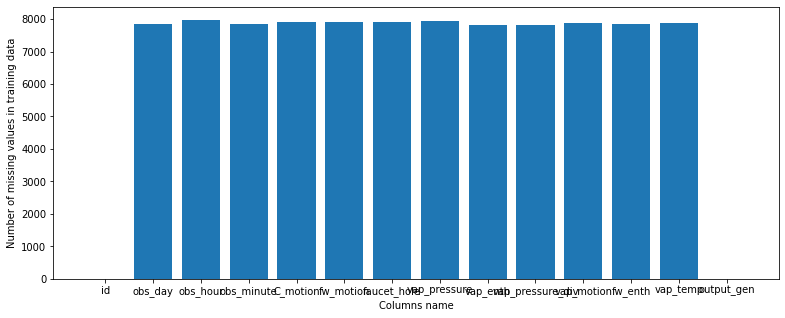

In [6]:
plt.figure(figsize = (13,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()

In [7]:
train_data.columns, train_data.isna().sum()

(Index(['id', 'obs_day', 'obs_hour', 'obs_minute', 'C_motion', 'fw_motion',
        'faucet_hole', 'vap_pressure', 'vap_enth', 'vap_pressure_div',
        'vap_motion', 'fw_enth', 'vap_temp', 'output_gen'],
       dtype='object'),
 id                     0
 obs_day             7837
 obs_hour            7970
 obs_minute          7852
 C_motion            7911
 fw_motion           7912
 faucet_hole         7915
 vap_pressure        7931
 vap_enth            7821
 vap_pressure_div    7803
 vap_motion          7892
 fw_enth             7843
 vap_temp            7888
 output_gen             0
 dtype: int64)

In [8]:
train_data['obs_hour'] = train_data['obs_hour'].replace(np.NaN,train_data['obs_hour'].mean())
train_data['obs_minute'] = train_data['obs_minute'].replace(np.NaN,train_data['obs_minute'].mean())
train_data['C_motion'] = train_data['C_motion'].replace(np.NaN,train_data['C_motion'].mean())
train_data['fw_motion'] = train_data['fw_motion'].replace(np.NaN,train_data['fw_motion'].mean())
train_data['faucet_hole'] = train_data['faucet_hole'].replace(np.NaN,train_data['faucet_hole'].mean())
train_data['vap_pressure'] = train_data['vap_pressure'].replace(np.NaN,train_data['vap_pressure'].mean())
train_data['vap_pressure_div'] = train_data['vap_pressure_div'].replace(np.NaN,train_data['vap_pressure_div'].mean())
train_data['vap_motion'] = train_data['vap_motion'].replace(np.NaN,train_data['vap_motion'].mean())
train_data['fw_enth'] = train_data['fw_enth'].replace(np.NaN,train_data['fw_enth'].mean())
train_data['vap_temp'] = train_data['vap_temp'].replace(np.NaN,train_data['vap_temp'].mean())
train_data['vap_enth'] = train_data['vap_enth'].replace(np.NaN,train_data['vap_enth'].mean())


In [9]:
train_data.columns, train_data.isna().sum()

(Index(['id', 'obs_day', 'obs_hour', 'obs_minute', 'C_motion', 'fw_motion',
        'faucet_hole', 'vap_pressure', 'vap_enth', 'vap_pressure_div',
        'vap_motion', 'fw_enth', 'vap_temp', 'output_gen'],
       dtype='object'),
 id                     0
 obs_day             7837
 obs_hour               0
 obs_minute             0
 C_motion               0
 fw_motion              0
 faucet_hole            0
 vap_pressure           0
 vap_enth               0
 vap_pressure_div       0
 vap_motion             0
 fw_enth                0
 vap_temp               0
 output_gen             0
 dtype: int64)

In [10]:
train_data['obs_day'].describe()

count        64163
unique           2
top       Saturday
freq         33637
Name: obs_day, dtype: object

In [11]:
train_data['obs_day'].fillna('Saturday', inplace = True)


In [12]:
train_data.columns, train_data.isna().sum()

(Index(['id', 'obs_day', 'obs_hour', 'obs_minute', 'C_motion', 'fw_motion',
        'faucet_hole', 'vap_pressure', 'vap_enth', 'vap_pressure_div',
        'vap_motion', 'fw_enth', 'vap_temp', 'output_gen'],
       dtype='object'),
 id                  0
 obs_day             0
 obs_hour            0
 obs_minute          0
 C_motion            0
 fw_motion           0
 faucet_hole         0
 vap_pressure        0
 vap_enth            0
 vap_pressure_div    0
 vap_motion          0
 fw_enth             0
 vap_temp            0
 output_gen          0
 dtype: int64)

In [13]:
change = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
train_data['obs_day'] = train_data['obs_day'].map(change)


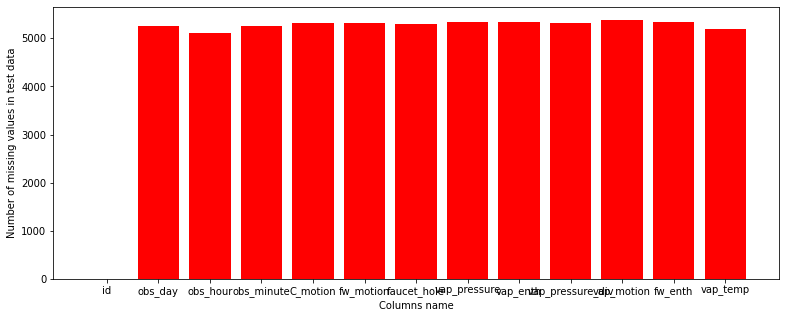

In [14]:
plt.figure(figsize = (13,5))
plt.bar(test_data.columns, test_data.isnull().sum().values, color = 'red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in test data")
plt.show()

In [15]:
test_data.columns, train_data.isna().sum()

(Index(['id', 'obs_day', 'obs_hour', 'obs_minute', 'C_motion', 'fw_motion',
        'faucet_hole', 'vap_pressure', 'vap_enth', 'vap_pressure_div',
        'vap_motion', 'fw_enth', 'vap_temp'],
       dtype='object'),
 id                  0
 obs_day             0
 obs_hour            0
 obs_minute          0
 C_motion            0
 fw_motion           0
 faucet_hole         0
 vap_pressure        0
 vap_enth            0
 vap_pressure_div    0
 vap_motion          0
 fw_enth             0
 vap_temp            0
 output_gen          0
 dtype: int64)

In [16]:
test_data['obs_hour'] = test_data['obs_hour'].replace(np.NaN,test_data['obs_hour'].mean())
test_data['obs_minute'] = test_data['obs_minute'].replace(np.NaN,test_data['obs_minute'].mean())
test_data['C_motion'] = test_data['C_motion'].replace(np.NaN,test_data['C_motion'].mean())
test_data['fw_motion'] = test_data['fw_motion'].replace(np.NaN,test_data['fw_motion'].mean())
test_data['faucet_hole'] = test_data['faucet_hole'].replace(np.NaN,test_data['faucet_hole'].mean())
test_data['vap_pressure'] = test_data['vap_pressure'].replace(np.NaN,test_data['vap_pressure'].mean())
test_data['vap_pressure_div'] = test_data['vap_pressure_div'].replace(np.NaN,test_data['vap_pressure_div'].mean())
test_data['vap_motion'] = test_data['vap_motion'].replace(np.NaN,test_data['vap_motion'].mean())
test_data['fw_enth'] = test_data['fw_enth'].replace(np.NaN,test_data['fw_enth'].mean())
test_data['vap_temp'] = test_data['vap_temp'].replace(np.NaN,test_data['vap_temp'].mean())
test_data['vap_enth'] = test_data['vap_enth'].replace(np.NaN,test_data['vap_enth'].mean())

In [17]:
test_data['obs_day'].fillna('Saturday', inplace = True)

In [18]:
change = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
test_data['obs_day'] = test_data['obs_day'].map(change)

In [19]:
test_data.columns, train_data.isna().sum()

(Index(['id', 'obs_day', 'obs_hour', 'obs_minute', 'C_motion', 'fw_motion',
        'faucet_hole', 'vap_pressure', 'vap_enth', 'vap_pressure_div',
        'vap_motion', 'fw_enth', 'vap_temp'],
       dtype='object'),
 id                  0
 obs_day             0
 obs_hour            0
 obs_minute          0
 C_motion            0
 fw_motion           0
 faucet_hole         0
 vap_pressure        0
 vap_enth            0
 vap_pressure_div    0
 vap_motion          0
 fw_enth             0
 vap_temp            0
 output_gen          0
 dtype: int64)

In [20]:
X_final = train_data.drop("output_gen", axis=1)
X = X_final.drop("id", axis=1)
y = train_data["output_gen"]

In [21]:
Final_X_test =  test_data.drop("id", axis=1)

In [22]:
print("shape of X_train",X.shape)
print("Shape of Y_train",Final_X_test.shape)


shape of X_train (72000, 12)
Shape of Y_train (48000, 12)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


clf = LinearRegression()


In [25]:
clf.fit(X_train,y_train)

LinearRegression()

In [26]:
preds = clf.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, preds))

40.60103156012485

In [28]:
preds = clf.predict(Final_X_test)

In [29]:
submit = pd.DataFrame({"id":test_data.id, 'output_gen':preds})


In [30]:
submit.to_csv('submission.csv', index=False)

print('--done--')

--done--
